In [10]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


Matplotlib is building the font cache; this may take a moment.


In [37]:
f_path="C://..."

df=pd.read_csv("electric_vehicles_spec_2025.csv")
dataframe = pd.DataFrame(df)
print(25*"*"+" First 10 Results "+"*"*25)
print(dataframe.head())
print(25*"*"+" Describe "+"*"*25)
print(dataframe.describe())
print(25*"*"+" Data Info "+"*"*25)
print(dataframe.info())
print(25*"*"+" Columns "+"*"*25)
print(dataframe.columns)
print(25*"*"+" isnull values "+"*"*25)
print(df.isnull().sum())

print(25*"*"+" Analyze... "+"*"*25)
dt=dataframe.groupby('brand').agg({
    'battery_capacity_kWh': 'mean',
    'range_km': 'mean',
    'number_of_cells': 'mean'
}).reset_index().head()
print(dt)

************************* First 10 Results *************************
    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towin

In [38]:
# Make sure to assign back to the dataframe
df = dataframe.fillna({
    'number_of_cells': df['number_of_cells'].mean(),
    'torque_nm': df['torque_nm'].mean(),
    'towing_capacity_kg': df['towing_capacity_kg'].mean(),
    'fast_charging_power_kw_dc': df['fast_charging_power_kw_dc'].mean()
})

print(dataframe.isnull().sum())

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64


In [39]:
print(25*"*"+" Data Info "+"*"*25)
print(dataframe.info())

************************* Data Info *************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    f

In [40]:
df2 = dataframe.sort_values(by='battery_capacity_kWh', ascending=False).iloc[0:10, 0:6]
print(df2)
print(dataframe['brand'].value_counts())
print("Measurements of the dataframe:")
print(dataframe.shape)
un=dataframe
df3 = dataframe[['brand', 'battery_capacity_kWh', 'range_km', 'number_of_cells']]
df4 = df3.sort_values(by='battery_capacity_kWh', ascending=False).iloc[0:10]
print(df4.sum())
def brand_battery_capacity(df):
    return (df.groupby('brand')['battery_capacity_kWh'].mean().reset_index().sort_values(by='battery_capacity_kWh', ascending=False)
    )
print(brand_battery_capacity(dataframe))
best= brand_battery_capacity(dataframe).iloc[0:10]    
brand_stats = dataframe.groupby('brand')['battery_capacity_kWh'].agg(['mean', 'std','min','max','median']).reset_index()
print(brand_stats)
br = dataframe['brand'].unique()
print("Number of unique brands:", dataframe['brand'].nunique())
print("Unique brands:", br)
print("brands with more than 10 models:")
mb_df = dataframe[dataframe['brand'] == 'Mercedes-Benz']
min_idx = mb_df['battery_capacity_kWh'].idxmin()
min_model = mb_df.loc[min_idx, 'model']
min_capacity = mb_df.loc[min_idx, 'battery_capacity_kWh']
print(f"Mercedes-Benz model with minimum battery capacity: {min_model} ({min_capacity} kWh)")

             brand                model  top_speed_kmh  battery_capacity_kWh  \
239  Mercedes-Benz             EQS 450+            210                 118.0   
245  Mercedes-Benz   EQS SUV 500 4MATIC            210                 118.0   
238  Mercedes-Benz       EQS 450 4MATIC            210                 118.0   
240  Mercedes-Benz       EQS 500 4MATIC            210                 118.0   
241  Mercedes-Benz       EQS 580 4MATIC            210                 118.0   
243  Mercedes-Benz   EQS SUV 450 4MATIC            210                 118.0   
244  Mercedes-Benz         EQS SUV 450+            210                 118.0   
242  Mercedes-Benz   EQS AMG 53 4MATIC+            250                 118.0   
246  Mercedes-Benz   EQS SUV 580 4MATIC            210                 118.0   
247  Mercedes-Benz  EQS SUV Maybach 680            210                 118.0   

    battery_type  number_of_cells  
239  Lithium-ion              NaN  
245  Lithium-ion              NaN  
238  Lithiu

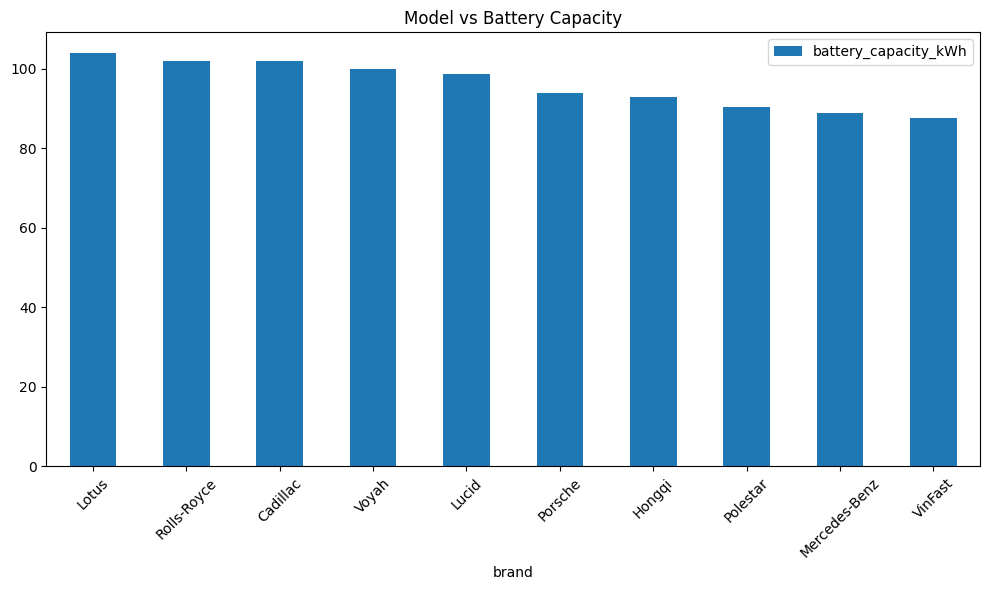

--------------------------------------------------Top 10 Brands by Mean Battery Capacity:--------------------------------------------------


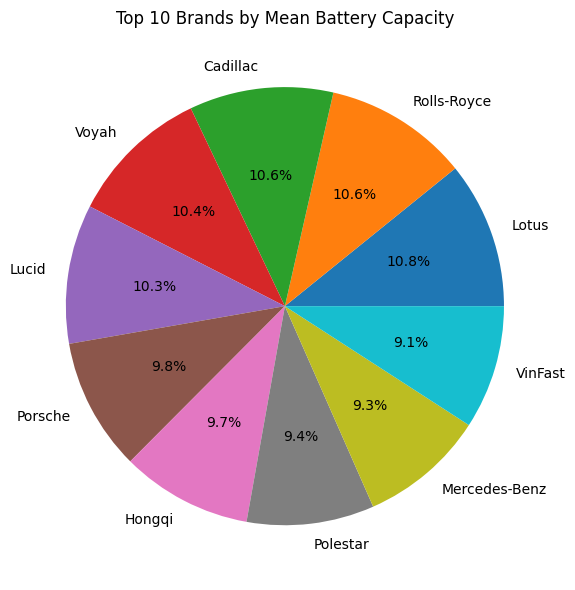

In [41]:
best.plot(kind='bar', x='brand', y='battery_capacity_kWh', title='Model vs Battery Capacity', figsize=(10, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("-"*50+"Top 10 Brands by Mean Battery Capacity:"+"-"* 50)
best.set_index('brand')['battery_capacity_kWh'].plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10, 6),
    title='Top 10 Brands by Mean Battery Capacity'
)
plt.ylabel('')
plt.tight_layout()
plt.show()


## Machine Learning

In [43]:
features = ['range_km', 'number_of_cells']
data_encoded = pd.get_dummies(dataframe, columns=['brand'], drop_first=True)

X = data_encoded[features + [col for col in data_encoded.columns if col.startswith('brand_')]]
y = data_encoded['battery_capacity_kWh']


clean_mask = ~(X.isnull().any(axis=1) | y.isnull())
X_clean = X[clean_mask]
y_clean = y[clean_mask]

print(f"Removed {len(X) - len(X_clean)} rows with missing values")
print(f"Final dataset: {len(X_clean)} samples")

Removed 202 rows with missing values
Final dataset: 276 samples


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(25*"*"+"İmplementation of 3 models"+"*"*25)
models = {
    'Linear Regression': (LinearRegression(), X_train_scaled, X_test_scaled),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test),
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), X_train, X_test)
}


for name, (model, X_tr, X_te) in models.items():
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    
    print(f"\n{name}:")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
    
    
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')
    print(f"CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


rf_model = models['Random Forest'][0]
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop Features:\n{importance.head()}")

df = pd.DataFrame({'brand': ['BMW', 'Tesla', 'BMW', 'Audi']})
print(df)

*************************İmplementation of 3 models*************************

Linear Regression:
R²: 0.878
RMSE: 6.761
MAE: 5.467
CV R²: 0.779 ± 0.051

Random Forest:
R²: 0.942
RMSE: 4.660
MAE: 2.999
CV R²: 0.859 ± 0.084

Gradient Boosting:
R²: 0.957
RMSE: 4.011
MAE: 3.088
CV R²: 0.856 ± 0.073

Top Features:
                feature  importance
0              range_km    0.771463
1       number_of_cells    0.134260
36  brand_Mercedes-Benz    0.030300
15           brand_Fiat    0.009405
54     brand_Volkswagen    0.008478
   brand
0    BMW
1  Tesla
2    BMW
3   Audi
